In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#import dataset
sonar_data = pd.read_csv("Copy of sonar data.csv", header = None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
sonar_data.shape

(208, 61)

In [4]:
sonar_data.describe()  #gives statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
sonar_data[60].value_counts().reset_index()   #Gives the count of unique categorical values in the column

,60,count
0,M,111
1,R,97


In [6]:
sonar_data.groupby(60).mean()  #60 is the column of the dataframe

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [7]:
#Separating data and label or independent and dependent variables(60th column, R or M)
X = sonar_data.drop(columns = 60, axis  = 1) #independent
y = sonar_data[60]  #dependent

In [8]:
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [9]:
print(y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [10]:
#separate them into training and test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)   
#stratify -> uses the categorical data in this column as the outcomes

In [11]:
print(X.shape, train_X.shape, test_X.shape)

(208, 60) (166, 60) (42, 60)


# Logistic regression

In [12]:
#Model training
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [13]:
#Model evaluation
#find accuracy in training data
X_train_prediction = model.predict(train_X)
training_data_accuracy = accuracy_score(X_train_prediction, train_y)
print("accuracy of training data: ", training_data_accuracy)

accuracy of training data:  0.8433734939759037


In [14]:
#find accuracy of testing data
X_test_prediction = model.predict(test_X)
testing_data_accuracy = accuracy_score(X_test_prediction, test_y)
print("accuracy of testing data: ", testing_data_accuracy)

accuracy of testing data:  0.6904761904761905


Looks like the model is overfitting. Let's use decision tree

# Decision tree classifier

[Text(0.42613636363636365, 0.9285714285714286, '10 <= 0.171\ngini = 0.497\nsamples = 166\nvalue = [89, 77]'),
 Text(0.13636363636363635, 0.7857142857142857, '44 <= 0.163\ngini = 0.299\nsamples = 60\nvalue = [11, 49]'),
 Text(0.09090909090909091, 0.6428571428571429, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.18181818181818182, 0.6428571428571429, '14 <= 0.275\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.13636363636363635, 0.5, '15 <= 0.122\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.09090909090909091, 0.35714285714285715, '15 <= 0.053\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.045454545454545456, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13636363636363635, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.22727272727272727, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.7159090909090909, 0.

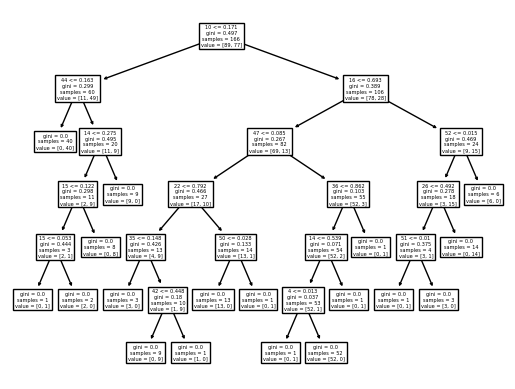

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(train_X, train_y)
features = list(range(60))
tree.plot_tree(dtree, feature_names=features)

Accuracy of dtree on test data

In [16]:
predicted_y_dtree = dtree.predict(test_X)
accuracy_score(predicted_y_dtree, test_y)

0.7142857142857143

Accuracy of dtree on training data

In [17]:
predicted_y_dtree_train = dtree.predict(train_X)
accuracy_score(predicted_y_dtree_train, train_y)

1.0

Model is overfitting again. Let's try random forest classsifier

# Random Forest Classsifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rndclass = RandomForestClassifier(n_estimators=75)
rndclass.fit(train_X, train_y)

RandomForestClassifier(n_estimators=75)

Accuracy on training data

In [19]:
train_randomclass_y_pred = rndclass.predict(train_X)
accuracy_score(train_randomclass_y_pred, train_y)

1.0

Accuracy on test data

In [20]:
test_randomclass_y_pred = rndclass.predict(test_X)
accuracy_score(test_randomclass_y_pred, test_y)

0.8333333333333334

Better than the previous models, however a model is still little bit overfitting, maybe we can improve using naive bayes algorithm

# Naive Bayes

In [21]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
bnb = BernoulliNB()
bnb.fit(train_X, train_y)

mnb = MultinomialNB()
mnb.fit(train_X, train_y)

gnb = GaussianNB()
gnb.fit(train_X, train_y)

GaussianNB()

For bnb

In [22]:
#On training data
pred_y_bnb_train = bnb.predict(train_X)
accuracy_score(pred_y_bnb_train, train_y)

0.5421686746987951

Model is underfitting

For mnb

In [23]:
#On training data
pred_y_mnb_train = mnb.predict(train_X)
accuracy_score(pred_y_mnb_train, train_y)

0.7530120481927711

In [24]:
#On test data
pred_y_mnb_test = mnb.predict(test_X)
accuracy_score(pred_y_mnb_test, test_y)

0.7857142857142857

Model is performing quite good(but not better than random forest)

For gnb

In [25]:
#On training data
pred_y_gnb_train = gnb.predict(train_X)
accuracy_score(pred_y_gnb_train, train_y)

0.7469879518072289

In [26]:
#On test data
pred_y_gnb_test = gnb.predict(test_X)
accuracy_score(pred_y_gnb_test, test_y)

0.6666666666666666

# Overall, random forest classifier gives the best accuracy with lowest bias and variance